In [4]:
import numpy as np
import gym
import math
import torch as T
import random
from EnvGym import MyEnv
from sac_agent import SAC_Agent
import time
import matplotlib.pyplot as plt

In [5]:
s0 = 100 # initial mid-price

T = 1 # terminal time

sigma = 2 # volatility

gamma = 0.1 # risk aversion parameter

k = 1.5 # k = alpha*K and this is determined by the market order size

A = 140 # scaling factor that depends on frequency  of market buy or sell orders and market order size

N_prices = 200

dt = 1/ N_prices # time step

In [6]:
env = MyEnv(s0, sigma, dt, N_prices, A, k)

agent = SAC_Agent([3], env=env)

train_start = time.time()
epochs_start = time.time()

epoch_num = 10

train_rewards = np.empty(shape=epoch_num)
for epoch in range(epoch_num):
    print("EPOCH: ", epoch)
    
    env.reset()


    # --------------------------------------------- now i have state I am at now
    done = False
    while not done:

        print("State now: ", env.state_now)

        action = agent.pick_action(env.state_now)
        print("Action I pick: ", action)
        state_now = env.state_now
   
        # --------------------------------------------- now i also have action I would like to take
            
        state_next, reward, done, _, _ = env.step(action)

        print("State I arrived: ", env.state_now)


        agent.remember(state_now, action, reward, state_next, done)
        print()
    
    agent.learn()



    # save cumulative reward for epoch
    train_rewards[epoch] = env.reward_total
    print()


C:\Users\dusan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\gym\spaces\box.py:127: UserWarning: WARN: Box bound precision lowered by casting to float32
  logger.warn(f"Box bound precision lowered by casting to {self.dtype}")


EPOCH:  0
State now:  (100, 1, 0)
Action I pick:  [-100.59848     -1.9977272]
Bid:  -99.6  Price:  100  Ask:  -101.6
Hit Ask
State I arrived:  (99.82266089833985, 0.995, 0.01)

State now:  (99.82266089833985, 0.995, 0.01)
Action I pick:  [-101.84601    -1.997694]
Bid:  -100.85  Price:  99.82  Ask:  -102.84
Hit Ask
State I arrived:  (99.87040016042154, 0.99, 0.02)

State now:  (99.87040016042154, 0.99, 0.02)
Action I pick:  [-103.66525     -1.9976984]
Bid:  -102.67  Price:  99.87  Ask:  -104.66
Hit Ask
State I arrived:  (99.89390520713029, 0.985, 0.03)

State now:  (99.89390520713029, 0.985, 0.03)
Action I pick:  [-103.09198     -1.9976989]
Bid:  -102.09  Price:  99.89  Ask:  -104.09
Hit Ask
State I arrived:  (99.76827518290087, 0.98, 0.04)

State now:  (99.76827518290087, 0.98, 0.04)
Action I pick:  [-43.169582   -1.9976741]
Bid:  -42.17  Price:  99.77  Ask:  -44.17
Hit Ask
State I arrived:  (99.79122601511473, 0.975, 0.05)

State now:  (99.79122601511473, 0.975, 0.05)
Action I pick:  

ValueError: Expected parameter loc (Tensor of shape (2,)) of distribution Normal(loc: torch.Size([2]), scale: torch.Size([2])) to satisfy the constraint Real(), but found invalid values:
tensor([nan, nan], grad_fn=<ViewBackward0>)

In [7]:
train_rewards

array([-3.96208686e+004, -3.90638074e+004, -4.30787154e+004,
       -4.19126525e+004,  0.00000000e+000,  0.00000000e+000,
        0.00000000e+000,  0.00000000e+000,  0.00000000e+000,
        1.11253693e-308])

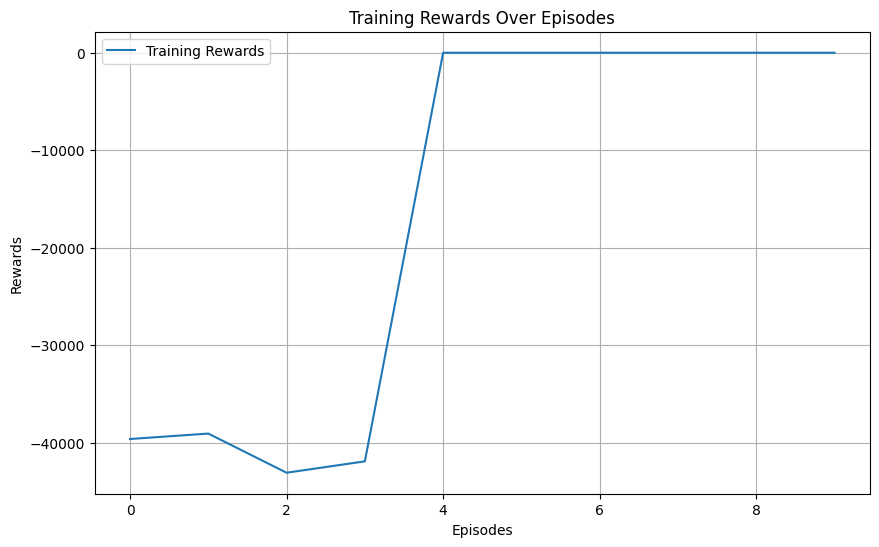

In [8]:
plt.figure(figsize=(10, 6))
plt.plot(train_rewards, label='Training Rewards', linestyle='-')
plt.title('Training Rewards Over Episodes')
plt.xlabel('Episodes')
plt.ylabel('Rewards')
plt.legend()
plt.grid(True)
plt.savefig('training_rewards_plot.png')
plt.show()